# ESS330 Yellowstone Project

Sammy Tetrault (CSU)  
Zoe Gagalis (CSU)  
Zoe Ellis (CSU)  
April 10, 2025

## Abstract

As ecological threats like climate change and natural resource exploitation overwhelm and disturb ecosystems across biomes (@cabrales), scientists are challenged with finding and testing solutions that can help ecosystems achieve resiliency. In the Western United States, one issue that scientists are tackled with addressing is the consequences of past removal and extirpation of predator species from ecosystems (@beschta). When key predator species are removed, prey species can become overpopulated and this can degrade vegetation. One solution for this issue implemented in Yellowstone National Park is the reintroduction of wolves. The idea behind this solution is to initiate a trophic cascade, in which predator species reduce prey populations, removing pressure from primary producer species, promoting nutrient availability, and supporting overall ecosystem health (@morris). Using population data, we created two sets of models, ARIMA and GLM, to investigate whether or not wolf populations could be used to predict populations of two prey species: bison and elk. We also investigated whether or not prey populations could be used to predict each other. Our ARIMA and GLM models were both unsuccessful at predicting prey populations using wolf data, however our GLMs using prey populations to predict each other produced highly significant results (R-squared \> 0.9). These models demonstrated that as one prey population increases, the other decreases. This indicates that resource competition between prey species is a large driver of population dynamics. While our models were unable to successfully demonstrate a relationship between wolf populations and prey populations, our results show that controlling one prey population would likely allow another to thrive.

## Introduction

Wolf reintroduction after their nearly 70-year absence in Yellowstone National Park has been one of the most highly monitored, discussed, and debated wildlife restoration efforts in recent decades. Following the reintroduction of the wolves (Canis lupus) to this part of Wyoming as a wildlife conservation effort, there have been noticeable changes to surrounding ecosystems, including other mammal populations such as bison and elk, as well as plant populations such as willows and other riparian vegetation within the national park \[@ripple2012\]. With how extensive this research is presented, as well as how long the study has gone on for, our goal is to zoom in on aspects regarding the predator/prey relationship and its overall effect on Yellowstone. Our project, which will have a primary focus on species population dynamics and trends, will aim to understand and explain these impacts and how trophic cascades can have an enormous and lasting impact on ecosystems. Importantly, these effects are not always straightforwardly positive or negative. While wolf reintroduction has supported the regrowth of riparian habitats and enhanced biodiversity in some areas, it has also shifted the dynamics of competition among prey species and changed the structure of Yellowstone’s food webs. By exploring how these interactions evolve over time, we aim to highlight the multifaceted and interconnected nature of ecosystem responses to change. The project and analysis will focus on how these trophic interactions can change, help, and hinder surrounding habitats, ecosystems, and food webs. We suspect that the analysis of the data we have gathered on wolf reintroduction in the park regarding species population counts will reveal dramatic changes in the populations of both elk and bison, and will illustrate how bringing wolves back to this area creates cascading impacts on the entire ecosystem, by demonstrating how wolves impact two species who have existed in Yellowstone without any natural predators for many years. It is likely that elk will show a steep decreasing trend after wolf reintroduction, as their population was largely uncontrolled for several decades and allowed to explode to high numbers \[@metz2016\]. Bison, which are naturally less vulnerable to predators, will likely respond differently in regards to population numbers, as the decreasing number of elk allows the bison to live in an area where there is now less competition for resources with other species \[@smith2000\]. Through our data analysis, we aim to show the indirect effects of this major change, and we hope to be able to create an easily palatable and understandable reference for people like us, who are otherwise removed from these issues. By making this information more digestible, we hope for our audience to gain a broader understanding of this issue and why it is important to understand trophic dynamics within the ecosystems that we know and love. Additionally, since Colorado has been experimenting with wolf reintroduction since 2023, an action that has been met with widespread controversy and criticism, we hope that our analysis of these impacts will help Coloradans better understand the impacts of bringing the wolf population back to its native habitat. While this conservation initiative has been controversial for many residents in surrounding areas, we hope to help provide a better understanding of why it was done, its impacts, and the importance of efforts like this one.

## Data Exploration, Cleaning, and Model-Building

#### Data Description

The data that we are looking at comes from a study conducted by David Cooper and Tom Hobbs of Colorado State University. Their study investigated Salix height as a response to browsing and the water table \[@cooper\].For our study, we are interested in the relationship between wolf population count and grazer population counts (elk and bison). The first dataset that we are using is a bison data csv which includes date, population count, adult count, and calf count. The second dataset is a wolf data csv which includes site, year, and population count. The third dataset is an elk data csv which includes year, mean population count, and upper and lower confidence intervals.

#### Opening the data

In [ ]:
library(readr)

library(here)

here() starts at C:/Users/sammy/OneDrive/Desktop/ESS330/ESS330-Yellowstone-Project

Rows: 66 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): date
dbl (2): year, calves
num (2): total, adults

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 34 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): year, mean, lwrCL, uprCL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 3 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Site
dbl (27): 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

#### Cleaning the data

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

#### Visualizing the data

ℹ Please use the `linewidth` argument instead.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

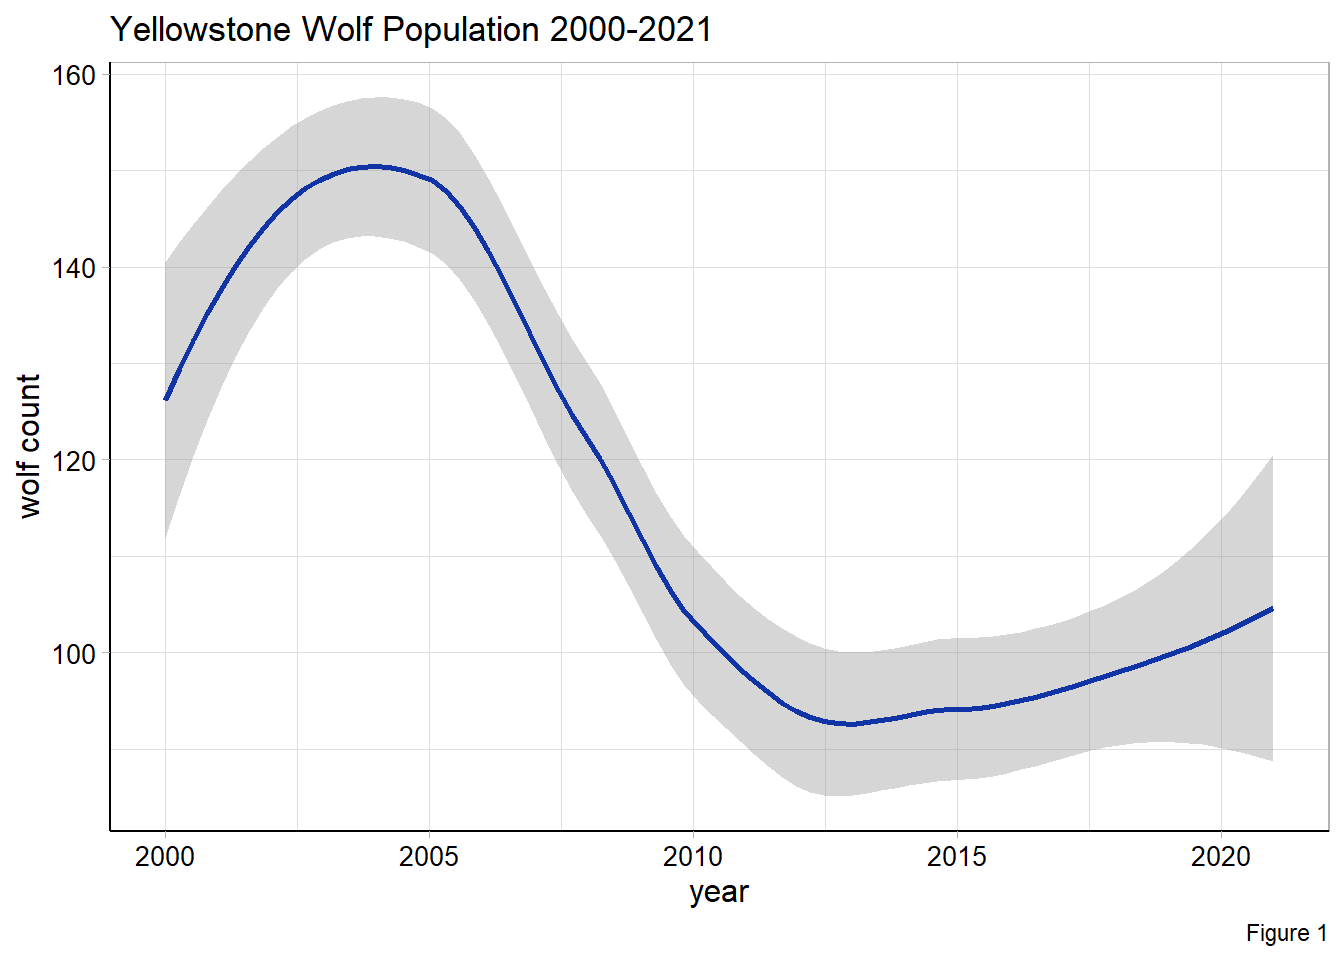

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

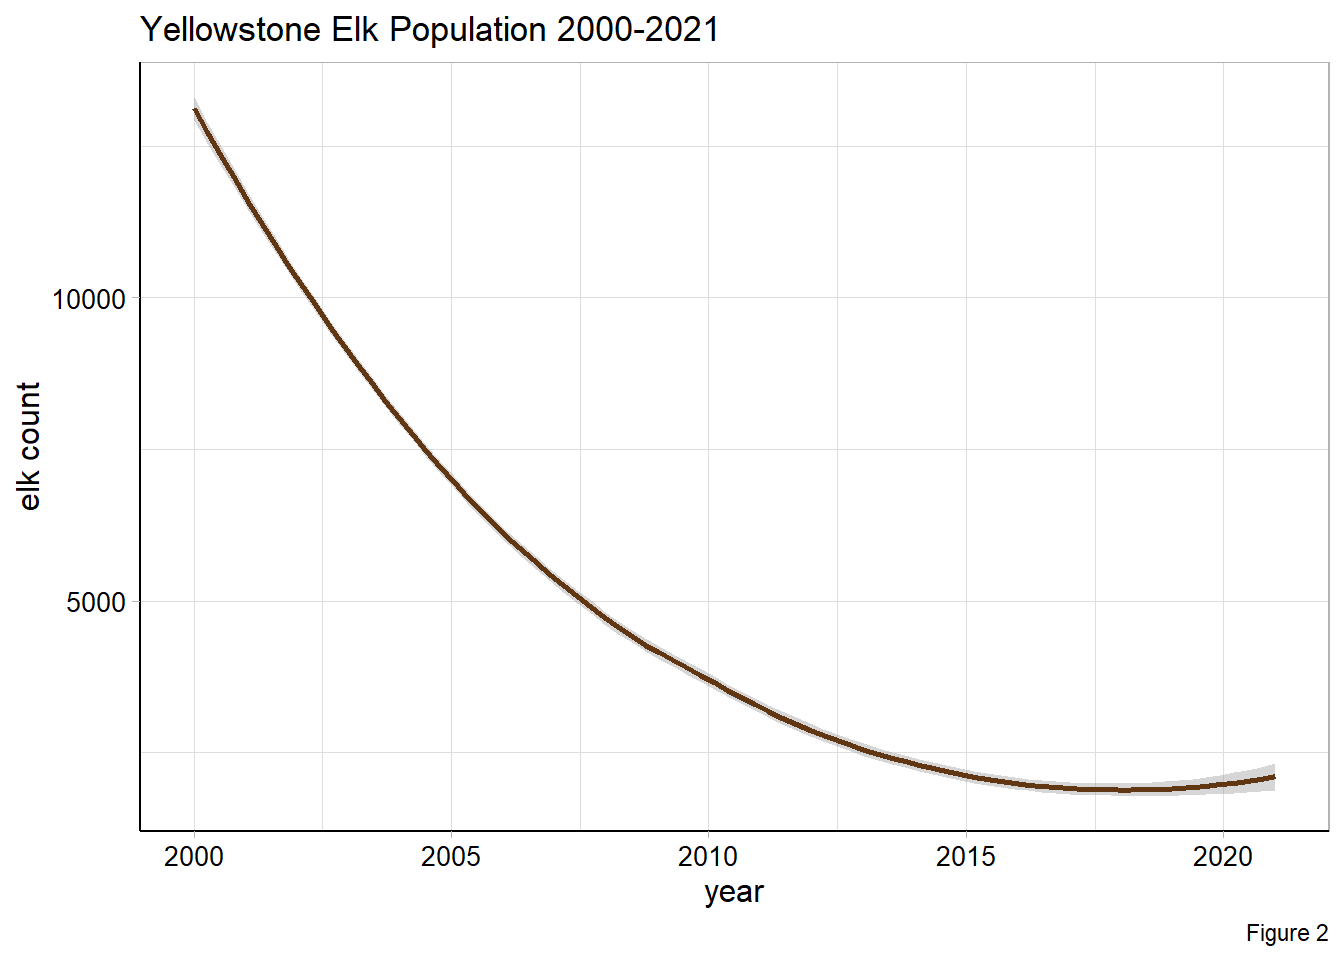

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

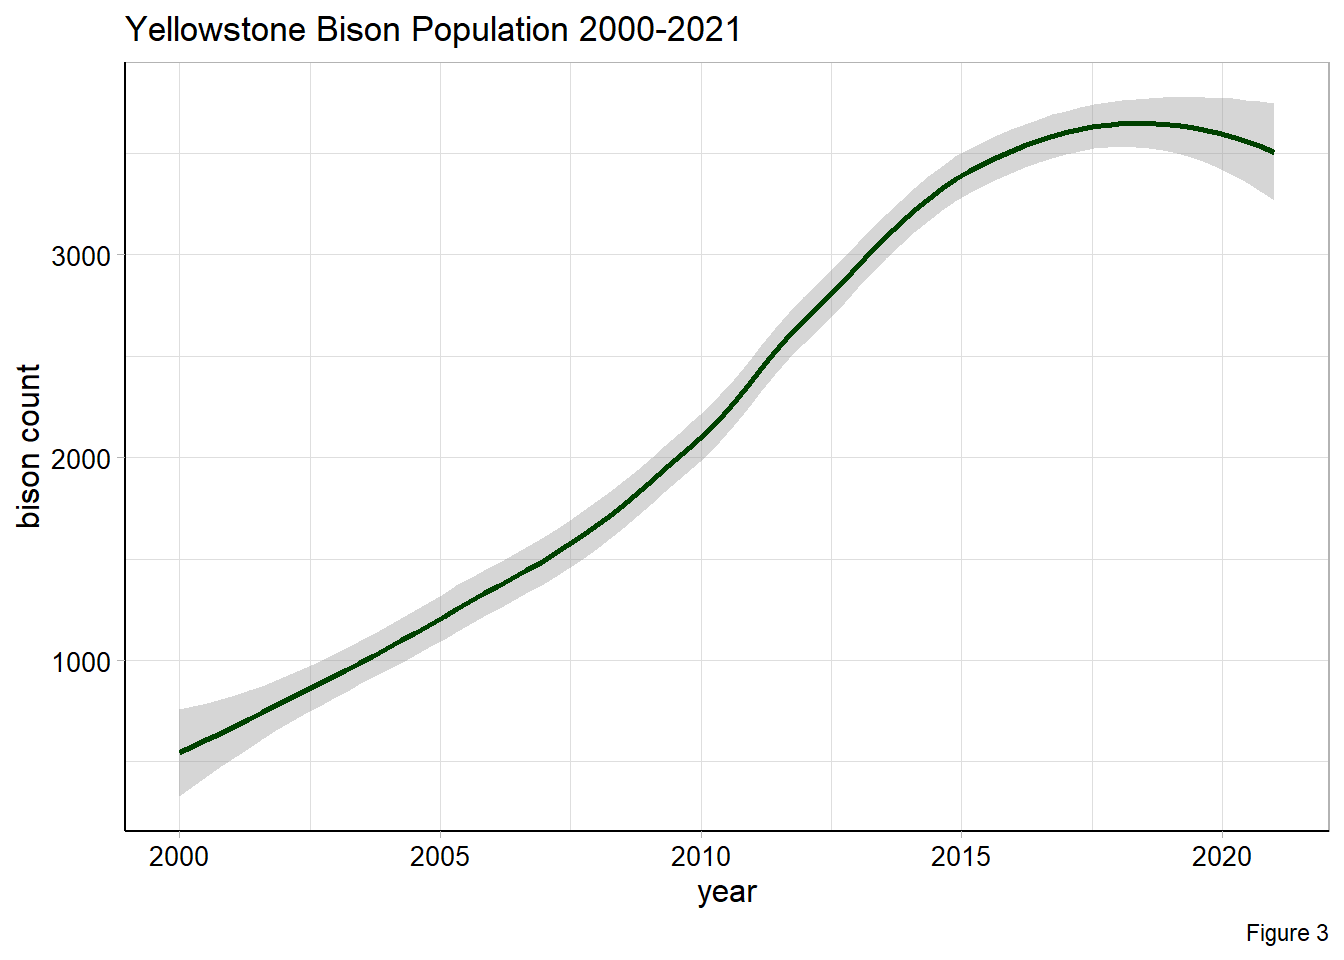

In [ ]:
library(ggplot2)

wolf_pop_plot = ggplot(data = data, aes(x = year, y = wolf_count)) +
  geom_smooth(color = "#1034A6") +
  labs(title = "Yellowstone Wolf Population 2000-2021",
       x = "year",
       y = "wolf count",
       caption = "Figure 1") +
  theme_light() +
# making axes nicely visible
  theme(axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12),
        axis.text.x = element_text(size = 10, color = "black"),
        axis.text.y = element_text(size = 10, color = "black"),
        axis.line = element_line(color = "black", size = 0.5))

#### Testing the data

First we tested the wolf count data for normality using the Shapiro-Wilk test. This test had a p-value of 5.507e-06, indicating that we should reject the null. The null of this test is that the data is normal, thus this indicates that the wolf population data is not normal.

In [ ]:
shapiro.test(data$wolf_count)


    Shapiro-Wilk normality test

data:  data$wolf_count
W = 0.86479, p-value = 5.507e-06

Next, we tested the elk count data using the same test. Again, the p-value was highly significant(2.789e-07). This indicates that the elk population data is also not normal.

In [ ]:
shapiro.test(data$elk_count)


    Shapiro-Wilk normality test

data:  data$elk_count
W = 0.82078, p-value = 2.789e-07

Lastly, we tested the bison count data using the same test. Once again, the p-value was highly significant(0.0005066). This suggests that the bison population data is also not normal.

In [ ]:
shapiro.test(data$bison_count)


    Shapiro-Wilk normality test

data:  data$bison_count
W = 0.91907, p-value = 0.0005066

The next test we ran was a QQ test. We generated QQ plots for each population count and from looking at the plots found that while the populations do tend to follow the normal distribution line, there are deviations for all three groups, suggesting non-normality.


Attaching package: 'ggpubr'

The following objects are masked from 'package:flextable':

    border, font, rotate

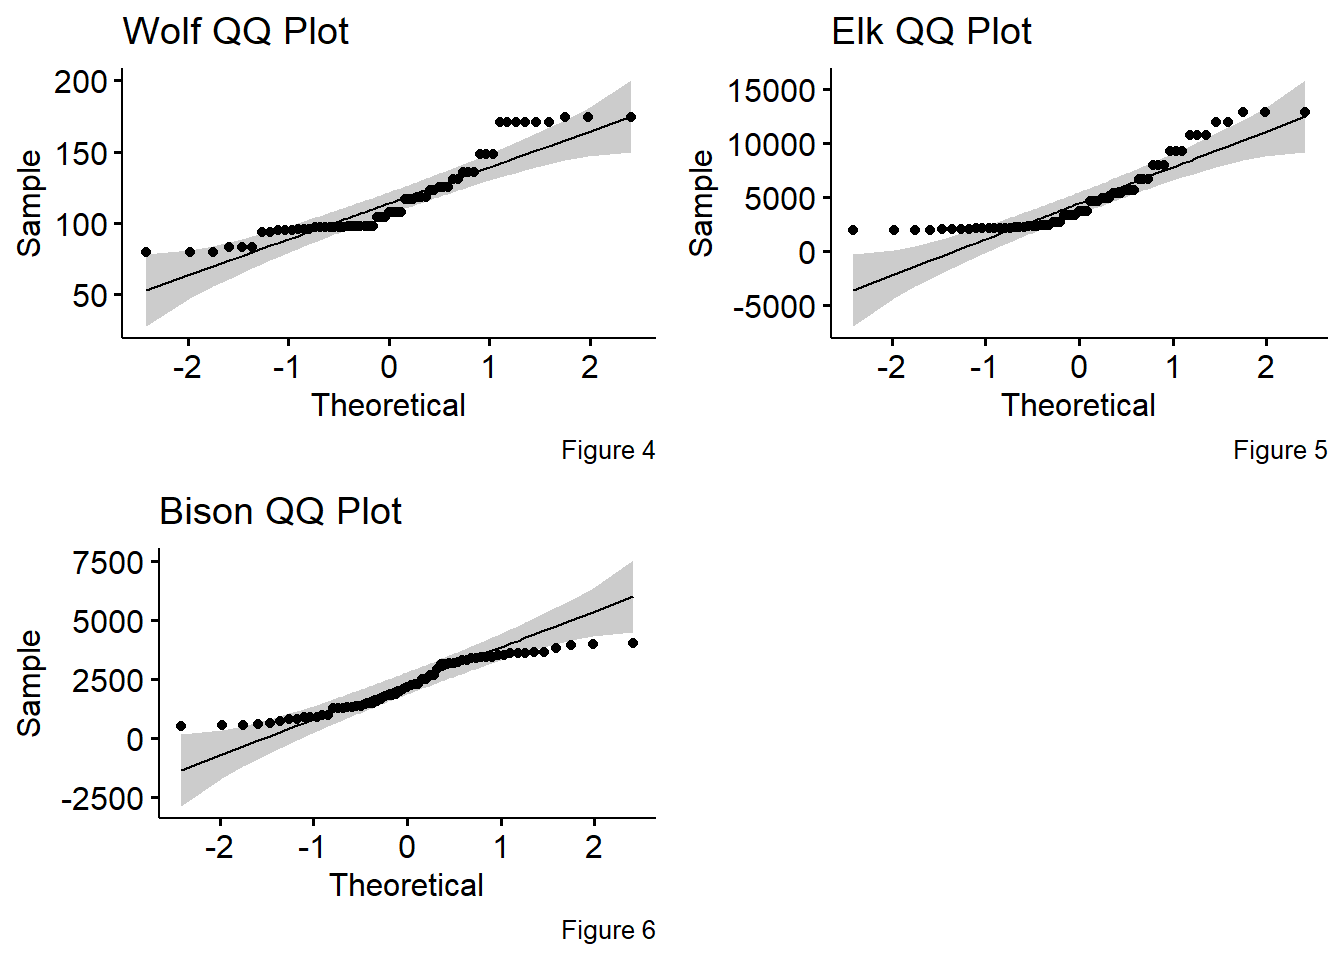

In [ ]:
# wolf qqplot
library(ggpubr)

#### Creating Models

In [ ]:
library(modeltime)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tibble       3.2.1
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2
✔ recipes      1.3.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()  masks flextable::compose()
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()


Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

tibble [63 × 4] (S3: tbl_df/tbl/data.frame)
 $ year       : num [1:63] 2000 2000 2000 2001 2001 ...
 $ wolf_count : num [1:63] 117 117 117 131 131 148 148 148 174 174 ...
 $ elk_count  : num [1:63] 12835 12835 12835 11936 11936 ...
 $ bison_count: int [1:63] 553 508 590 661 719 548 812 805 878 888 ...

tibble [22 × 4] (S3: tbl_df/tbl/data.frame)
 $ year       : Date[1:22], format: "2000-01-01" "2001-01-01" ...
 $ wolf_count : num [1:22] 117 131 148 174 171 118 136 171 125 96 ...
 $ bison_count: num [1:22] 550 690 722 921 1060 ...
 $ elk_count  : num [1:22] 12835 11936 10662 9215 7974 ...

Using date_var: year

frequency = 5 observations per 5 years

frequency = 5 observations per 5 years
frequency = 5 observations per 5 years
frequency = 5 observations per 5 years

# A tibble: 4 × 9
  .model_id          .model_desc       .type   mae  mape  mase smape  rmse   rsq
  <chr>              <chr>             <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Wolf Predict Bison REGRESSION WITH … Fitt…  190.  7.87 0.735  7.82  224. 0.926
2 Wolf Predict Elk   REGRESSION WITH … Fitt…  206.  6.79 0.795  6.84  275. 0.943
3 Elk Predict Bison  REGRESSION WITH … Fitt…  217.  8.28 0.842  8.31  266. 0.899
4 Bison Predict Elk  REGRESSION WITH … Fitt…  178.  5.80 0.689  5.93  265. 0.951

#### Creating Actual Vs. Predicted Models

In [ ]:
forecast <- forecast %>%
  filter(.model_desc != "ACTUAL") %>%
  rename(year = .index)%>%
  select(.model_id, year, .value)

merged_vals <- merge(forecast, data, by = "year")

wolf_predict_bison <- merged_vals %>%
  filter(.model_id == "Wolf Predict Bison")

wolf_predict_elk <- merged_vals %>%
  filter(.model_id == "Wolf Predict Elk")

elk_predict_bison <- merged_vals %>%
  filter(.model_id == "Elk Predict Bison")

bison_predict_elk <- merged_vals %>%
  filter(.model_id == "Bison Predict Elk")

lm_wolf_bison <- lm(bison_count ~ .value, data = wolf_predict_bison)

summary(lm_wolf_bison)


Call:
lm(formula = bison_count ~ .value, data = wolf_predict_bison)

Residuals:
   Min     1Q Median     3Q    Max 
-518.1 -369.5 -138.3  445.8  558.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2071.6713   828.6843  -2.500   0.0266 *  
.value          0.9422     0.1556   6.056 4.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 433.6 on 13 degrees of freedom
Multiple R-squared:  0.7383,    Adjusted R-squared:  0.7182 
F-statistic: 36.68 on 1 and 13 DF,  p-value: 4.058e-05


Call:
lm(formula = elk_count ~ .value, data = wolf_predict_elk)

Residuals:
   Min     1Q Median     3Q    Max 
-889.7 -367.8 -177.5  303.0 1438.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37593.130   5669.231   6.631 1.63e-05 ***
.value        -16.759      2.736  -6.125 3.63e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 619.7 on 13 degrees of freedom
Multiple R-squared:  0.7427,    Adjusted R-squared:  0.7229 
F-statistic: 37.52 on 1 and 13 DF,  p-value: 3.63e-05


Call:
lm(formula = bison_count ~ .value, data = elk_predict_bison)

Residuals:
   Min     1Q Median     3Q    Max 
-696.2 -174.1   25.3  261.7  453.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.279e+04  1.977e+03  -6.471 2.10e-05 ***
.value       4.968e+00  6.251e-01   7.947 2.41e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 350.2 on 13 degrees of freedom
Multiple R-squared:  0.8293,    Adjusted R-squared:  0.8162 
F-statistic: 63.15 on 1 and 13 DF,  p-value: 2.405e-06


Call:
lm(formula = elk_count ~ .value, data = bison_predict_elk)

Residuals:
    Min      1Q  Median      3Q     Max 
-715.17 -334.80   58.11  242.67  897.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.145e+04  1.535e+03  -7.462 4.75e-06 ***
.value       7.782e+00  8.309e-01   9.365 3.83e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 438.9 on 13 degrees of freedom
Multiple R-squared:  0.8709,    Adjusted R-squared:  0.861 
F-statistic: 87.71 on 1 and 13 DF,  p-value: 3.83e-07

#### Plotting Actual Vs. Predicted

Saving 7 x 5 in image

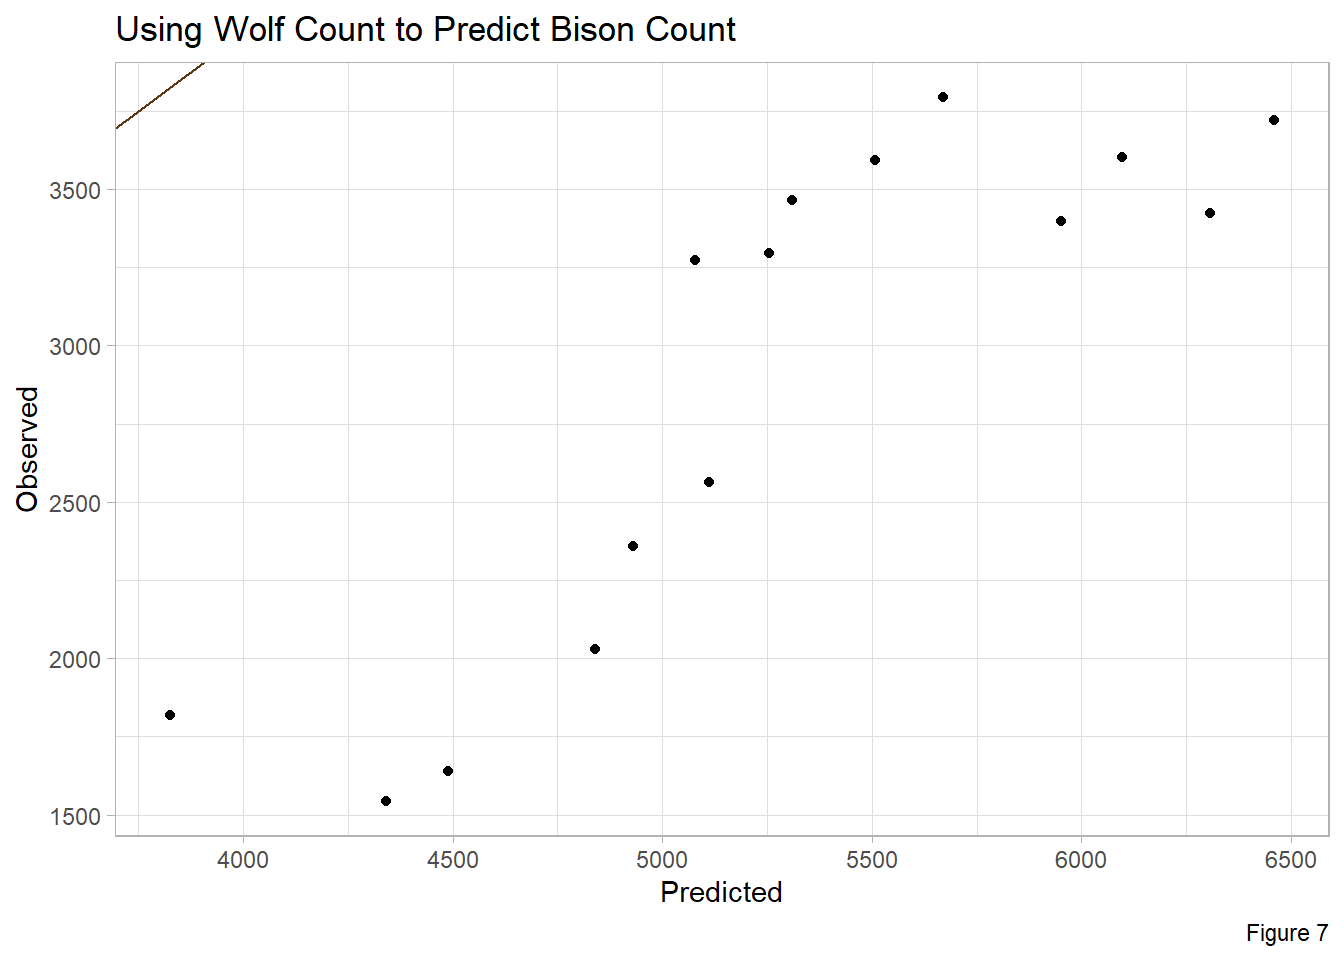

In [ ]:
library(ggplot2)

lm_wolf_bison <- ggplot(wolf_predict_bison, aes(x = .value, y = bison_count)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "#613613")+
  labs(x = "Predicted", y = "Observed",
       title = "Using Wolf Count to Predict Bison Count", 
       caption = "Figure 7")+
  theme_light()

ggsave("lm_wolf_bison.png")

Saving 7 x 5 in image

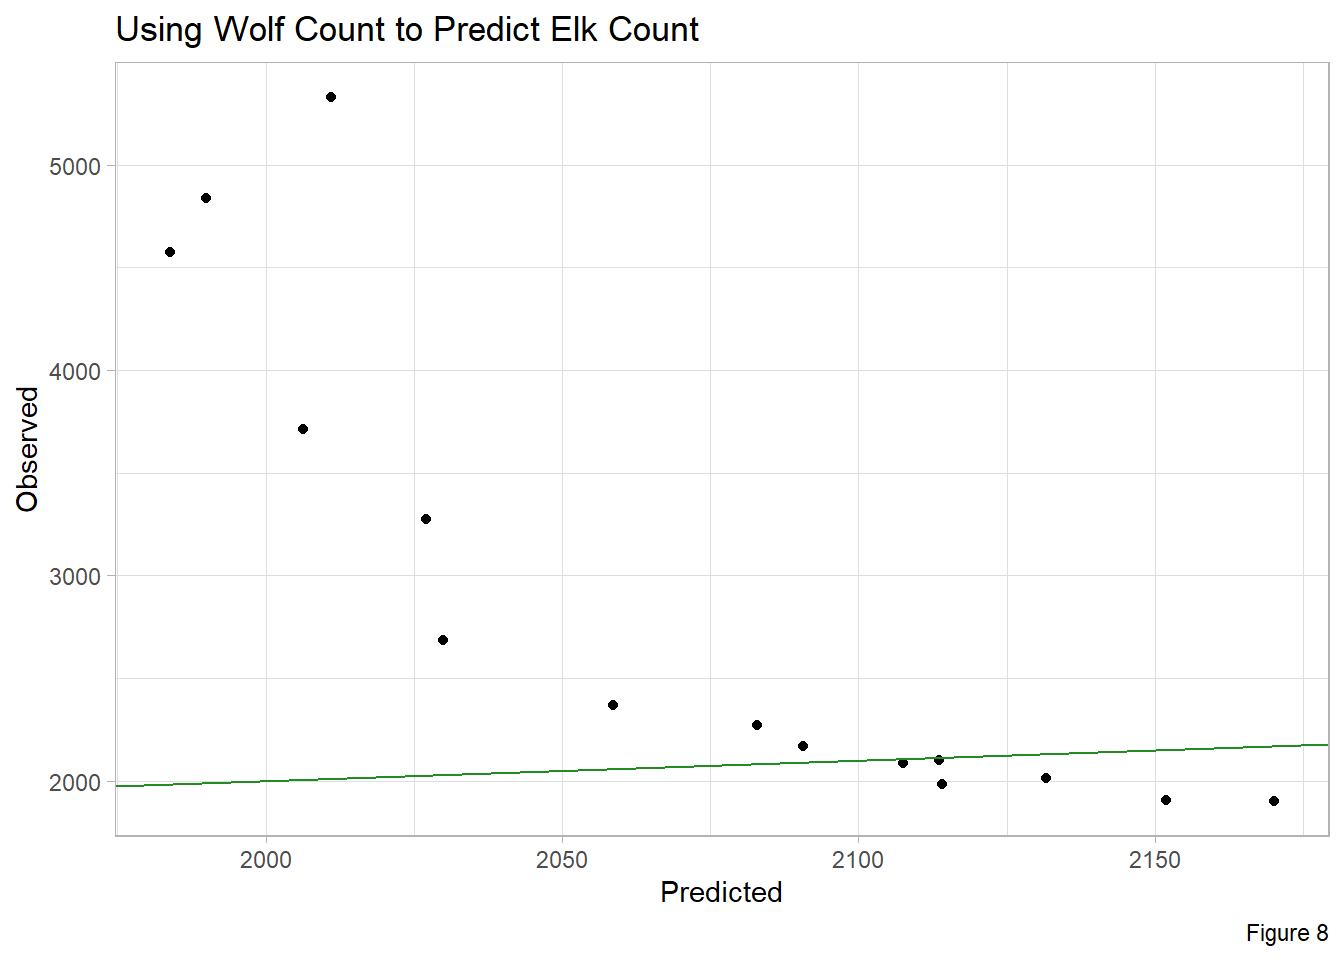

In [ ]:
library(ggplot2)

lm_wolf_elk <- ggplot(wolf_predict_elk, aes(x = .value, y = elk_count)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "#228B22")+
  labs(x = "Predicted", y = "Observed",
       title = "Using Wolf Count to Predict Elk Count", 
       caption = "Figure 8")+
  theme_light()

ggsave("lm_wolf_elk.png")

Saving 7 x 5 in image

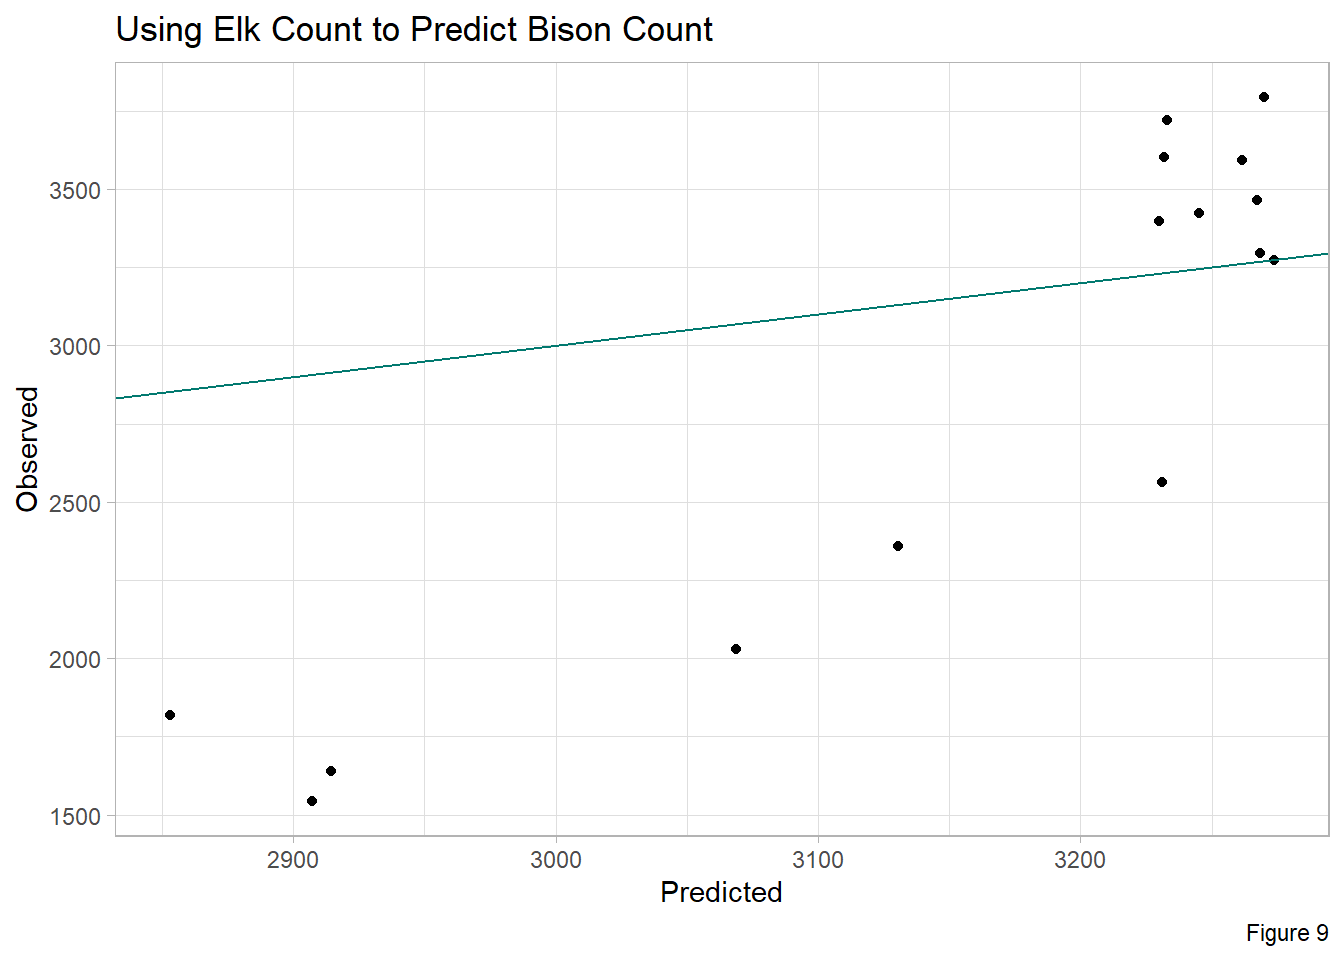

In [ ]:
library(ggplot2)

lm_elk_bison <- ggplot(elk_predict_bison, aes(x = .value, y = bison_count)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "#01796F")+
  labs(x = "Predicted", y = "Observed",
       title = "Using Elk Count to Predict Bison Count",
       caption = "Figure 9")+
  theme_light()

ggsave("lm_elk_bison.png")

Saving 7 x 5 in image

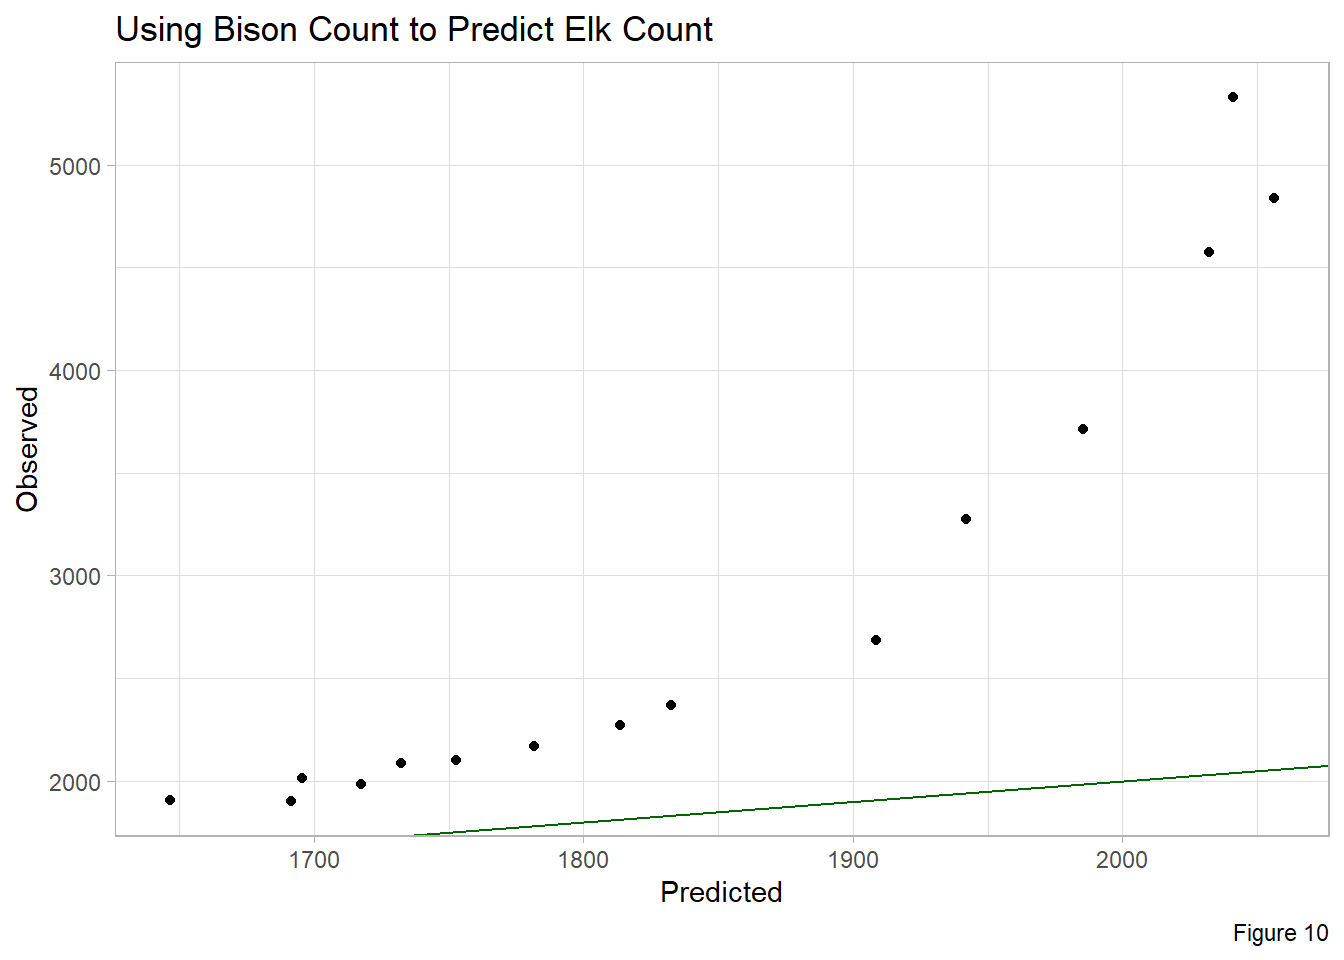

In [ ]:
library(ggplot2)

lm_bison_elk <- ggplot(bison_predict_elk, aes(x = .value, y = elk_count)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "#006400") +
  labs(x = "Predicted", y = "Observed",
       title = "Using Bison Count to Predict Elk Count",
       caption = "Figure 10")+
  theme_light()

ggsave("lm_bison_elk.png")

#### GLM Models

##### Wolf vs. Bison


Attaching package: 'performance'

The following objects are masked from 'package:yardstick':

    mae, rmse


Call:
glm(formula = bison_count ~ wolf_count, family = poisson, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  9.3081601  0.0216801  429.34   <2e-16 ***
wolf_count  -0.0141266  0.0001975  -71.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 13464.1  on 21  degrees of freedom
Residual deviance:  7534.7  on 20  degrees of freedom
AIC: 7745.6

Number of Fisher Scoring iterations: 4

[1] 0.4403906

Saving 7 x 5 in image

`geom_smooth()` using formula = 'y ~ x'

`geom_smooth()` using formula = 'y ~ x'

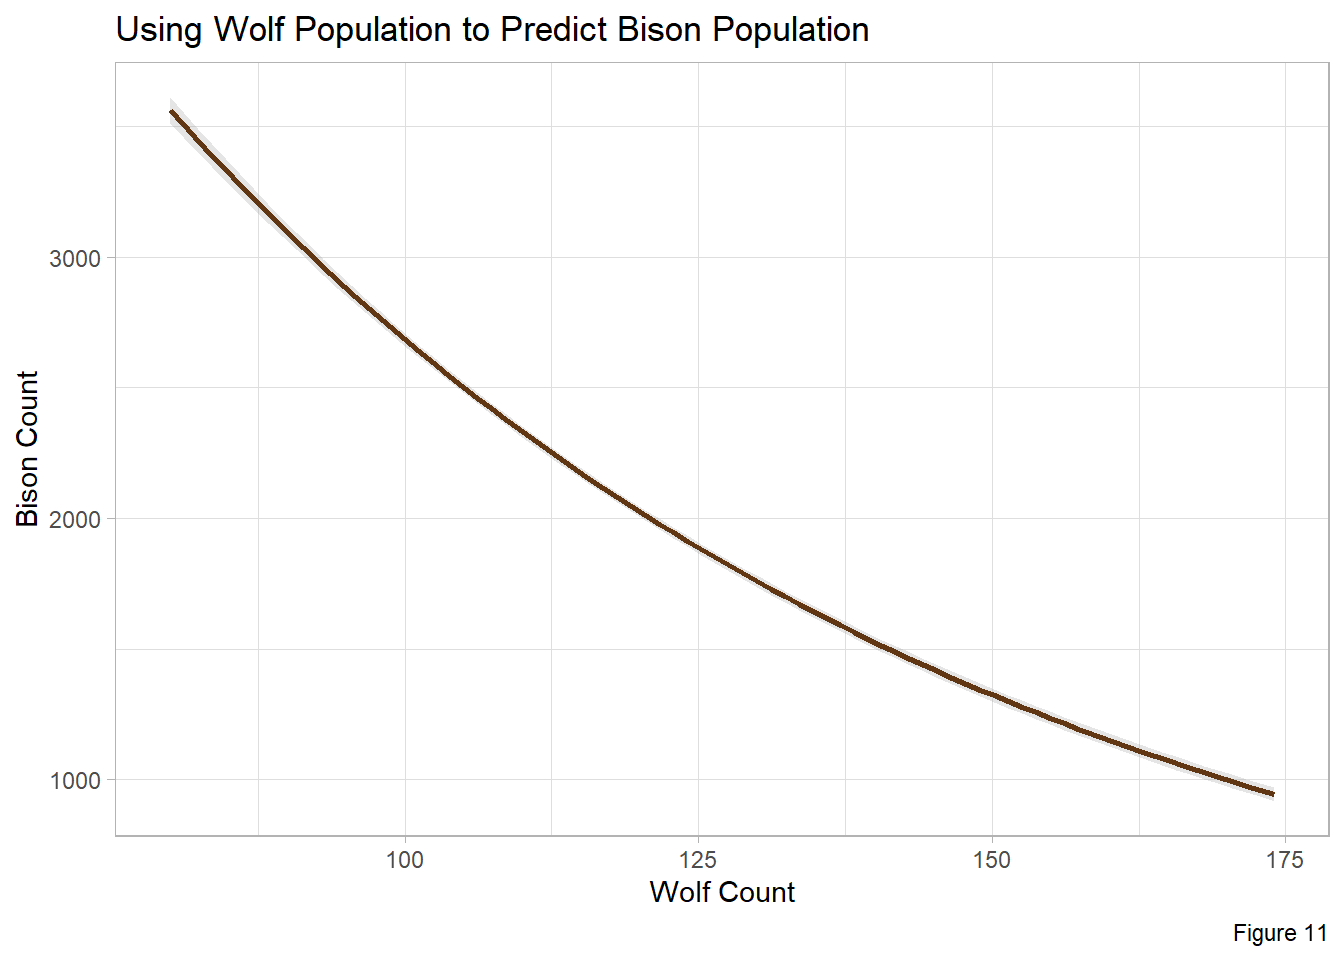

In [ ]:
library(ggplot2)
library(dplyr)
library(performance)

##### Wolf vs. Elk


Call:
glm(formula = elk_count ~ wolf_count, family = poisson, data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 6.824e+00  1.293e-02   527.9   <2e-16 ***
wolf_count  1.372e-02  9.781e-05   140.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 47195  on 21  degrees of freedom
Residual deviance: 28638  on 20  degrees of freedom
AIC: 28865

Number of Fisher Scoring iterations: 4

[1] 0.3932011

Saving 7 x 5 in image
`geom_smooth()` using formula = 'y ~ x'

`geom_smooth()` using formula = 'y ~ x'

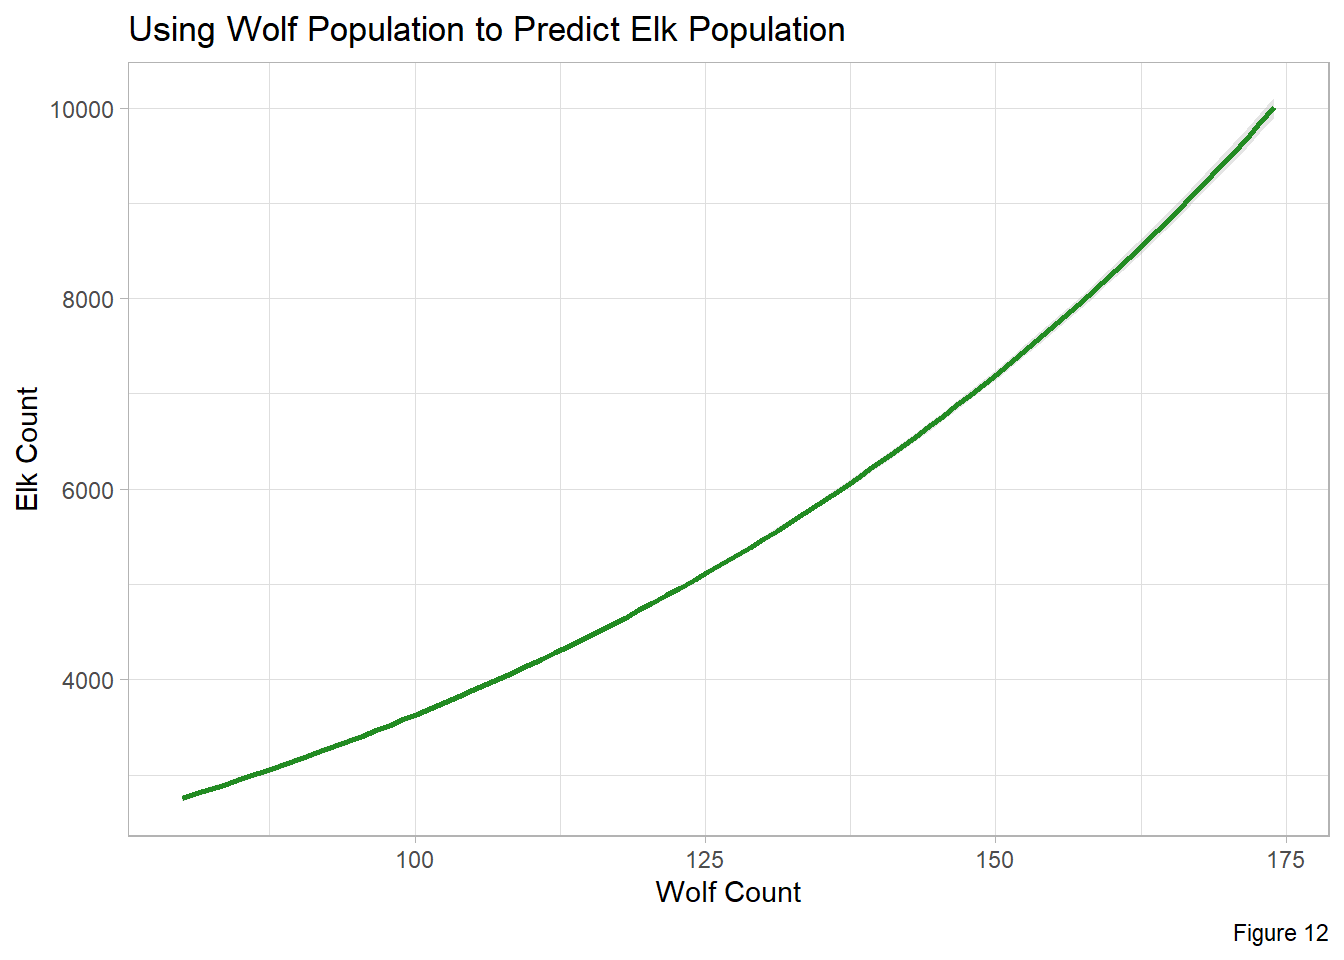

In [ ]:
wolf_elk_glm <- glm(elk_count ~ wolf_count, family = poisson, data = data)

summary(wolf_elk_glm)

##### Elk vs. Bison


Call:
glm(formula = bison_count ~ elk_count, family = poisson, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  8.508e+00  8.107e-03 1049.44   <2e-16 ***
elk_count   -1.925e-04  2.007e-06  -95.94   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 13464.13  on 21  degrees of freedom
Residual deviance:   675.95  on 20  degrees of freedom
AIC: 886.93

Number of Fisher Scoring iterations: 4

[1] 0.9497962

Saving 7 x 5 in image
`geom_smooth()` using formula = 'y ~ x'

`geom_smooth()` using formula = 'y ~ x'

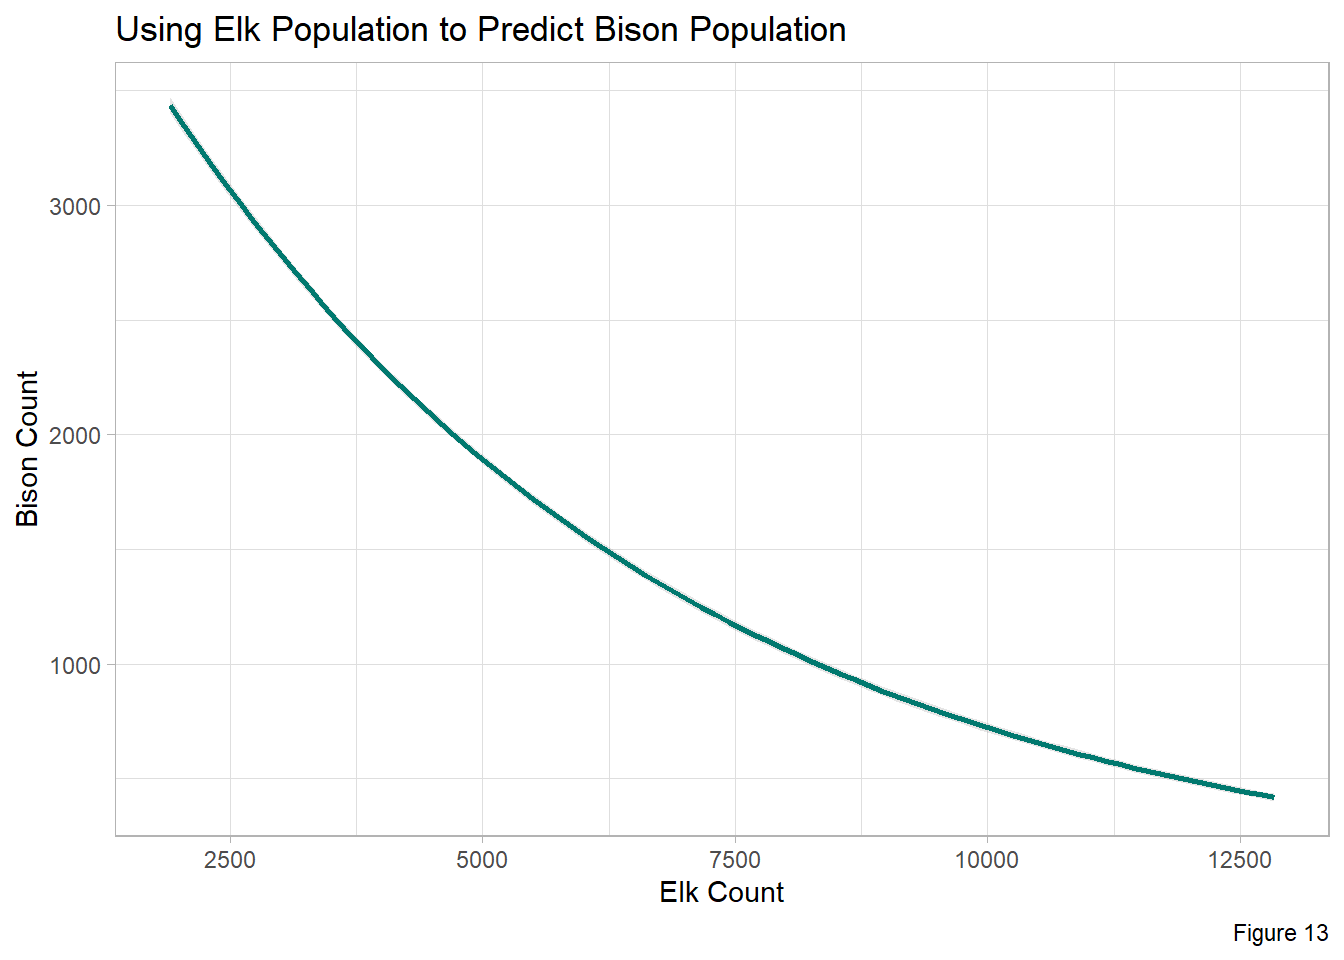

In [ ]:
elk_bison_glm <- glm(bison_count ~ elk_count, family = poisson, data = data)

summary(elk_bison_glm)

##### Bison vs. Elk


Call:
glm(formula = elk_count ~ bison_count, family = poisson, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  9.668e+00  5.755e-03  1679.9   <2e-16 ***
bison_count -6.138e-04  3.127e-06  -196.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 47195  on 21  degrees of freedom
Residual deviance:  2059  on 20  degrees of freedom
AIC: 2285.6

Number of Fisher Scoring iterations: 4

[1] 0.9563732

Saving 7 x 5 in image
`geom_smooth()` using formula = 'y ~ x'

`geom_smooth()` using formula = 'y ~ x'

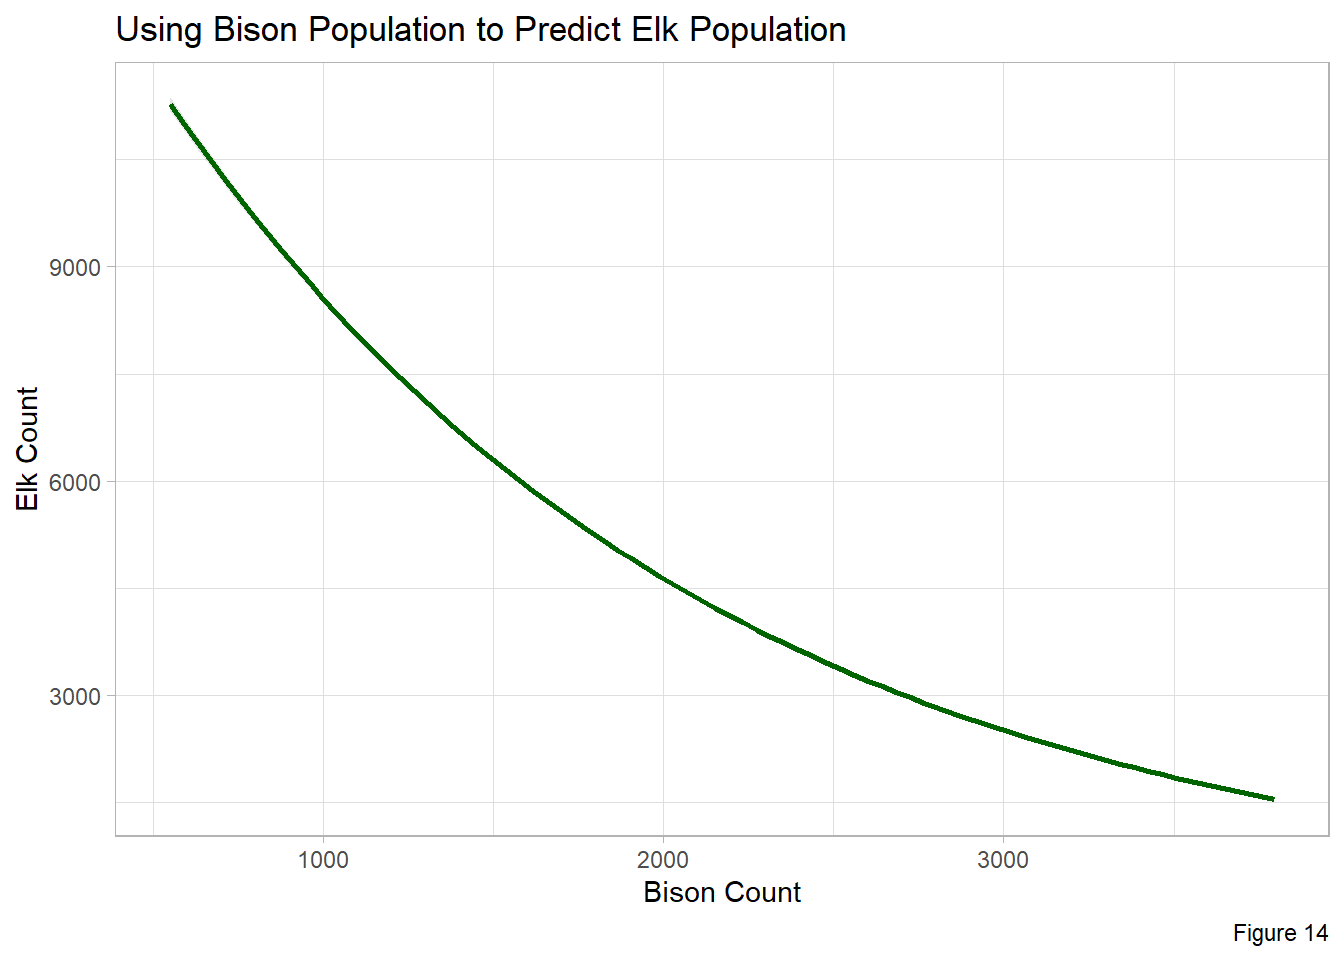

In [ ]:
bison_elk_glm <- glm(elk_count ~ bison_count, family = poisson, data = data)

summary(bison_elk_glm)

## Methods

We used two model types for our analysis, ARIMA and Generalized Linear Models. We created 4 ARIMA models, one for each prediction relationship (wolf count as a predictor for bison count and elk count, elk count as a predictor for bison count, and bison count as a predictor for elk count). We split our data into training and testing sets, with a 70/30 split. Models were aggregated in a list object contained within a models dataframe. Using the models dataframe we created a model tibble that we used to calibrate our models using the testing data. Using modeltime_accuracy() we compiled accuracy measures for the calibrated models, and then used our calibrated models to forecast predicted counts based on our data. In order to compare actual values vs. predicted values, we had to merge our forecast dataframe with our original data. We did this by renaming the .index column to “year” so that we could merge the two dataframes by “year”. We then created individual data frames for each prediction model (wolf count as a predictor for bison, …) Using these data frames, we were able to produce linear models for each prediction relationship of the response species’ actual count values versus the predicted count values. We summarized each of these models to produce summary statistics (of note, the R-squared value). It is important to note that these models were not recalibrated, thus predictions were skewed. To visualize the fit, we used ggplot to create plots of actual vs. predicted values, with a 1:1 line included for each plot to see how closely predictions matched actual values. After producing these plots, we were encouraged to try a different type of model that may better demonstrate the relationship between different populations. We chose to create GLMs for each prediction relationship as we knew that our data was non-normal. We used the Poisson family for our GLM because each of our data points is a count value. We then used the summary() function to compile model metrics. Summary was used to calculate R-squared using McFadden’s formula. Additionally, we used ggplot to create visualizations of each model, using geom_smooth and the method “glm” to create smooth curves of population relationships.

## Results

In the initial data exploration of “Yellowstone Wolf Population 2000-2021” (Figure 1) there is an observed trend over time. This graph displays a starting population of ~125 wolves in Yellowstone Park and follows the reintroduction a few years later, where the population hits its peak at ~150 wolves. The population then decreases to where it eventually plateaus. In “Yellowstone Elk Population 2000-2021”, the population of elk are measured over time. This resulted in a steady exponential decrease. The graph displaying “Yellowstone Bison Population 2001-2021” mirrors the previous trend, and exponentially increases over time, hitting its peak at approximately 3500 bison between the years 2015 and 2020.

The ARIMA plots created to investigate relationships between populations yielded significant results. We created linear models of the actual population count versus the population count predicted by each model to test the fit of these models. For our first model (Figure 7), which used wolf population count to predict bison population count, the adjusted R-squared value was 0.72. This indicates that the predicted bison population count could explain 72% of the variation in the actual bison population count. The estimate for the predicted bison population count was 0.94, meaning for every one unit increase in predicted bison count, the actual count increases by 0.94. The p-value for this estimate is significant (4.06e-05), thus indicating a strong linear relationship between the predicted and the actual bison population counts. The intercept estimate, -2071.67 (p = 0.03), means that when the predicted count is 0, the actual count is -2071.67. The actual population count cannot be negative, yet this statistic informs us that the predicted values are over-estimating, which can be seen in the “Using Wolf Count to Predict Bison Count” plot. Additionally, the residual standard error is 433.6, indicating variability between predicted counts and actual counts. For our next ARIMA model (Figure 8) in which we used wolf count to predict elk count, we created a linear model of actual elk count vs. predicted elk count and found that the adjusted R-squared was 0.72 as well, meaning that the predicted elk count could explain 72% of the variation in the actual elk population count. The estimate for the predicted elk population count was -16.76, meaning that for every one unit increase in predicted elk count, the actual count decreases by -16.76 (p = 3.63e-05). This suggests that the ARIMA model is significantly under-predicting elk population counts. Additionally, the intercept estimate is extremely high; the value of the intercept is 37,593 (p = 1.63e-05). This means that when the predicted elk count is 0, the actual count is 37,593. The residual standard error is 619.7, indicating that there is a high level of variability in this model (i.e. predicted values vary to a large degree from actual values). Although the linear relationship has a significant p-value, the model does not appear to be a good fit. Our next ARIMA model (Figure 9) used elk count to predict bison count. For our actual vs. predicted linear model, the adjusted R-squared value was 0.82, meaning that 82% of the variation in the actual bison count could be explained by the predicted elk count. We found that the estimate was 4.97, which had a significant p-value (2.41e-06), meaning that there is a strong linear relationship between actual and predicted bison count. This means for every one unit increase in predicted bison count, the actual bison count increased by 5. As for the intercept, the value was -12,790 (p = 2.10e-05), meaning that when the predicted count is 0, the actual count is -12,790, which could explain why the plot shows that predicted counts were much higher than actual counts on the left side of the graph despite the 4.97 estimate showing that the ARIMA model is slightly under-predicting. The residual standard error was 350.2, indicating variability between predicted and actual values, but to a much lesser degree than the model using wolf count to predict elk count. Our last ARIMA model (Figure 10) used bison count to predict elk count. The adjusted R-squared value for the model was 0.86, meaning that 86% of the variability in the actual elk counts could be explained by the predicted elk counts. For our actual vs. predicted linear model, we found that the estimate was 7.78 (p = 3.83e-07), meaning that for every one unit increase in the predicted elk count, the actual elk count increased by 7.78. The estimate, -11,450 (p = 4.75e-06), means that when the predicted elk count is 0, the actual elk count is -11,450. The residual standard error was 438.9, indicating variability between predicted values and actual values.

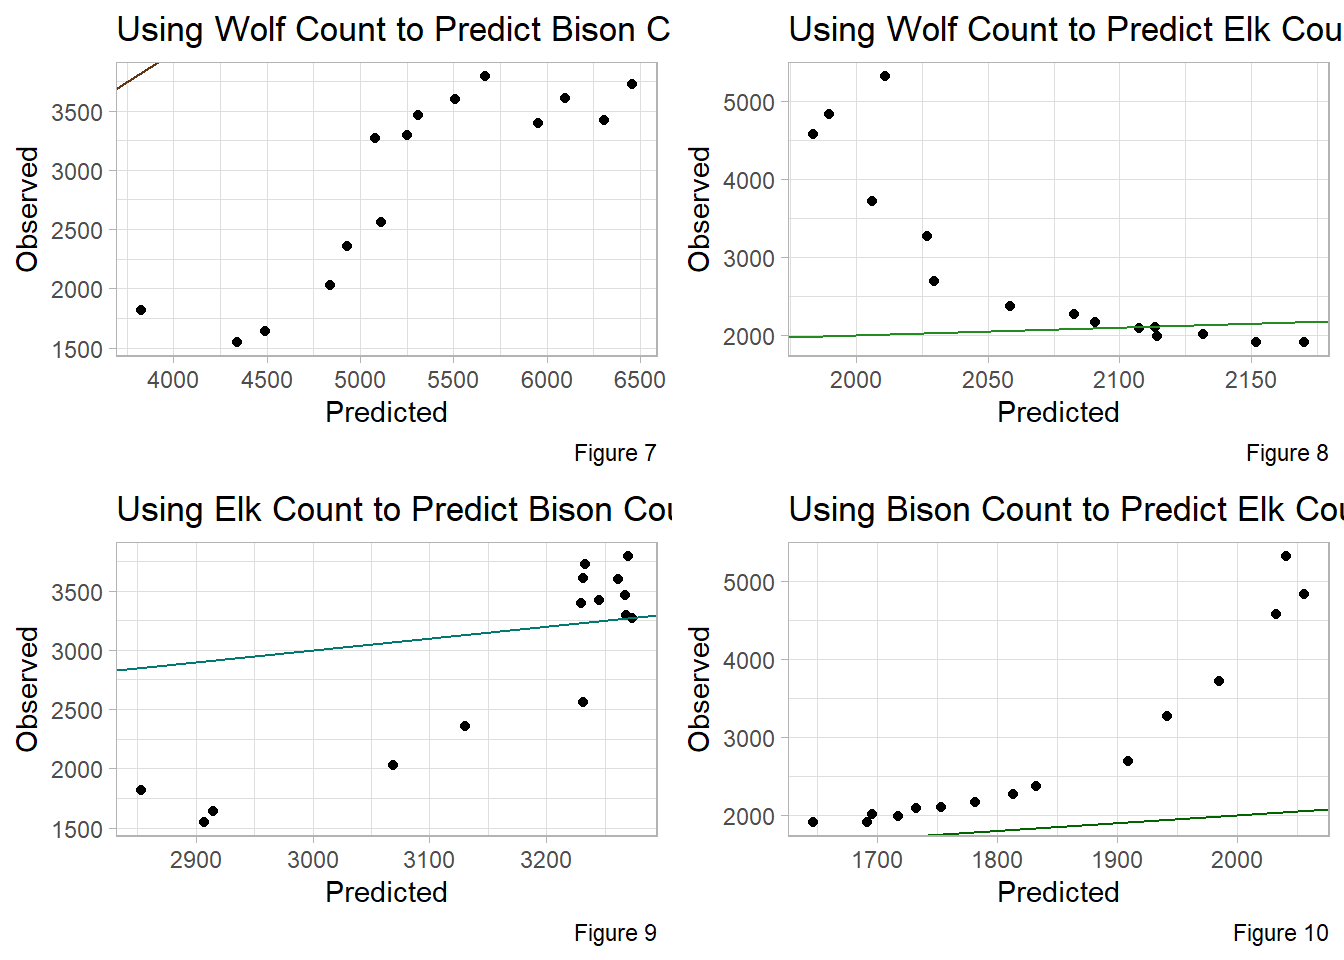

In [ ]:
ARIMA_models <- ggarrange(lm_wolf_bison, lm_wolf_elk, lm_elk_bison, lm_bison_elk)

print(ARIMA_models)

For our GLM models, we used McFadden’s R-squared values to assess the fit of each model (@bobbitt). Our first model (Figure 11) used wolf population counts to predict bison population counts. The estimate for wolf count was -0.014; since the Poisson family is log-based, this estimate means that for every one unit increase in wolf count, bison count decreases on a log-scale by 0.014 (p \< 2e-16). The R-squared value for this model was only 0.44, meaning that wolf population counts could only explain 44% of the variation in bison population counts. Our next model (Figure 12) used wolf population counts to predict elk population counts. The estimate for wolf count was 0.014 (p \< 2e-16). This estimate means that for every one unit increase in wolf count, elk count increases on a log-scale by 0.014. The R-squared value for this model was only 0.39, meaning that wolf population counts could only explain 39% of the variation in elk population counts. Our next model (Figure 13) used elk population counts to predict bison population counts. The estimate for elk count was −0.00019, meaning that for every one unit increase in elk population count, bison population count decreased by −0.00019 on a log scale. The R-squared value for this model was 0.95, meaning that elk population counts could explain 95% of the variation in bison population counts. Our last model (Figure 14) used bison population counts to predict elk population counts. The estimate for bison count was -0.0006, meaning that for every one unit increase in bison count, elk count decreases by -0.0006 on a log scale. The R-squared value for this model was 0.96, meaning that bison population counts could explain 96% of the variation in the model.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

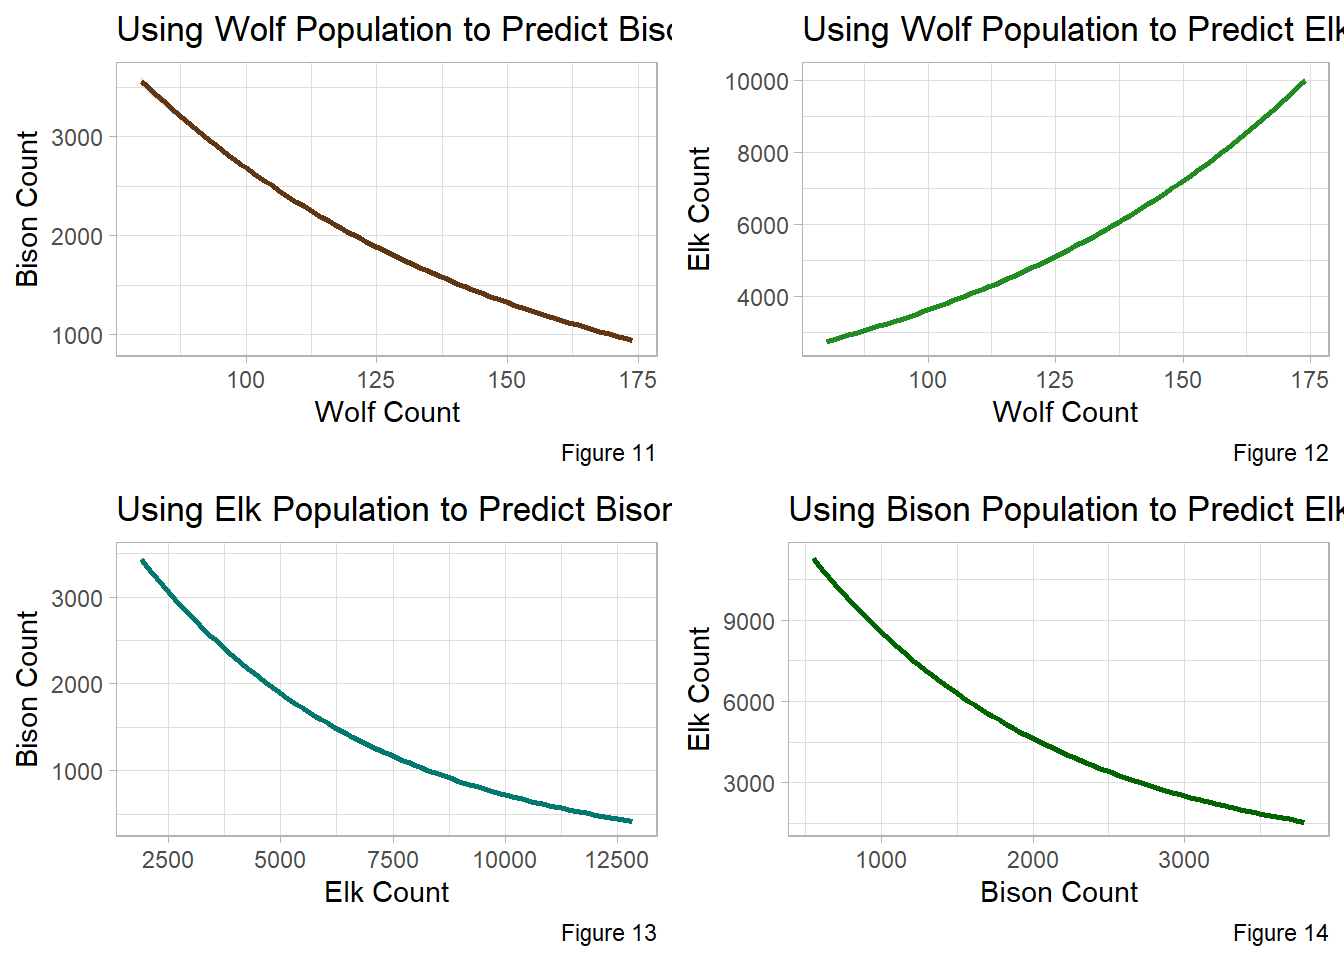

In [ ]:
GLM_models <- ggarrange(wolf_bison_gg, wolf_elk_gg, elk_bison_gg, bison_elk_gg)

## Discussion

Our four ARIMA models are difficult to draw conclusions from due to their limitations. We found that in our first ARIMA model (Figure 7) which used wolf populations to predict bison populations, the model was significantly over-predicting bison populations compared to actual observed bison counts. In our second ARIMA model (Figure 8) which used wolf populations to predict elk populations, the model was significantly under-predicting elk populations. Thus, neither model successfully used wolf population data to predict prey population counts. For our third ARIMA model (Figure 9) which used elk populations to predict bison populations, the model was over-predicting bison populations for lower observed values and under-predicting for higher observed values. For our fourth ARIMA model (Figure 10), which used bison populations to predict elk populations, the model was under-predicting. All models had high absolute values for estimate intercepts (\> 2,000 for all models), which contributed to inaccuracy. Because all of these models either significantly under or over-predicted population counts, we excluded them from our analysis of population dynamics.

Our four GLM models, however, produced some significant results. For our first GLM model (Figure 11), in which we used wolf populations to predict bison populations, the model demonstrated that as wolf population increases, bison population decreases. However, this model had an insignificant R-squared value (\<0.5), thus it unsuccessfully used wolf populations to predict bison populations. For our second GLM (Figure 12), in which we used wolf populations to predict elk populations, the model demonstrated that as wolf population increases, elk population increases. However, this model also had an insignificant R-squared value (\<0.4), thus it also unsuccessfully used wolf populations to predict bison populations. For our third GLM (Figure 13), in which we used elk populations to predict bison populations, we found that as elk populations increase, bison populations decrease. We observed the same trend in our fourth GLM (Figure 14), in which increases in bison populations correlated with decreases in elk populations. Both of these models had significant R-squared values (\> 0.9). Thus, these models were the only models successful at using one population to predict the other.

These results indicate that the strongest predictor of prey populations is other prey populations. This may be due to resource competition (@plumb). A related study conducted by Ripple et al. 2025 found significant evidence of trophic cascade in Yellowstone when wolves were reintroduced. In this instance, trophic cascade was evidenced through a decrease in herbivory from elk populations, which resulted in increased crown volume of willows (@ripple2025). Combining this study’s results with our own, we can extrapolate that high elk populations reduce willow crown volume, thus reducing available herbaceous resources, thus negatively impacting other prey populations that depend on the same resources.

This provides for the significance behind treating ecosystems that have lost an apex predator. Although our results do not show that wolf populations were able to predict prey populations, they do indicate that controlling one prey population may allow a different prey population to thrive. Through projects like wolf reintroduction, we can promote healthy and balanced ecosystems.

While these results allow us to better understand population dynamics in Yellowstone, our study had significant limitations. First, the data that we were able to use spanned only the years 2000-2021, though wolves were reintroduced 5 years prior. By removing 5 years of data, our models missed key information on initial wolf populations, thus the impact of wolves could be under-estimated as we do not see elk and bison population dynamics during the first 5 years of reintroduction. Additionally, our ARIMA models were not recalibrated, thus the models were not retrained. This may be why the models were under and over predicting by such high values, as they were not recalibrated to make realistic predictions. Another limitation of our study was that it only included a few species. Ecosystems are complex webs of population dynamics, thus only modeling a few select species from a vast ecosystem limits our understanding of interactions between species. Lastly, the wolf population was so variable during the window of time that our models used to make predictions that this may have lead to our models yielding confusing results, such as our Figure 12 model in which increasing wolf populations are correlated with increasing elk populations. As shown in figure 2, elk populations have decreased over time, so models may be comparing high elk populations in the early stages of wolf introduction to high wolf populations, which both decreased together as wolves were subject to selection pressures over time such as intraspecific competition and resource availability (@rich)

## Conclusion

Results from this study, combined with results from similar studies, demonstrate that there are significant relationships between predator and prey populations, and that reducing prey populations can positively benefit other prey populations, which could encourage balanced ecosystem dynamics. While our results did not show significant correlation between wolf and prey populations, prey populations were able to predict each other, emphasizing that there are strong connections between these species within the Yellowstone ecosystem. This information highlights the value of long-term population monitoring and multivariate analysis in understanding the full scope of ecological change. Moving forward, continued data collection and integrated ecosystem modeling will be crucial in guiding conservation policy and management strategies in Yellowstone and beyond. Recognizing how predator dynamics shape broader biodiversity can inform future efforts to restore and sustain ecological balance in protected natural areas.